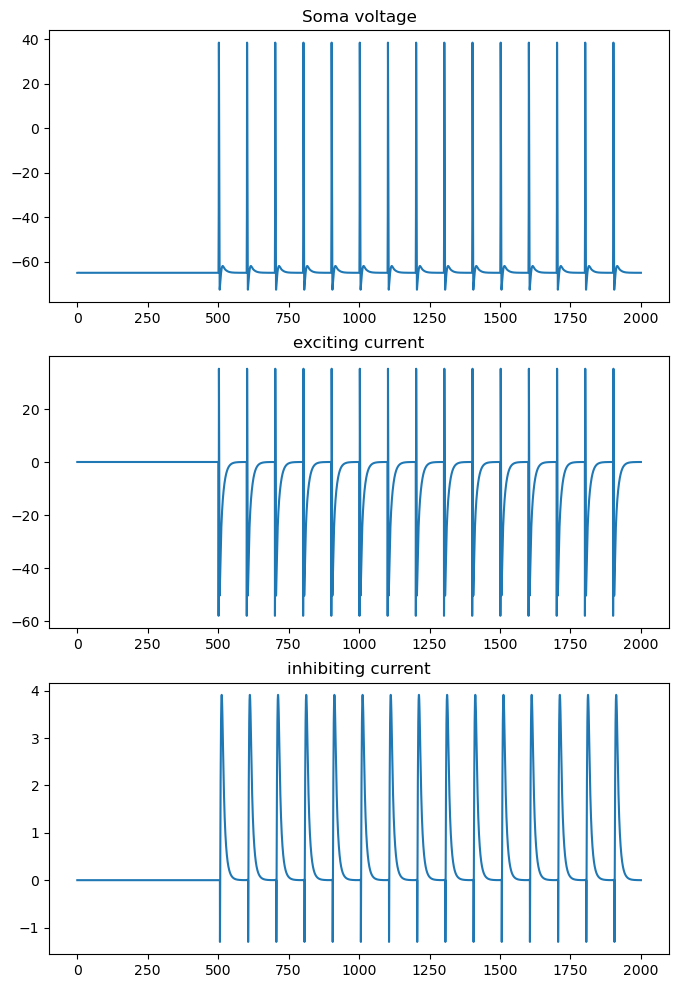

In [1]:
RunningInCOLAB = 'google.colab' in str(get_ipython())  # checks to see if we are in google colab
if RunningInCOLAB:                                     # installs packages and repo if in colab
    !pip install ipywidgets &> /dev/null
    !pip install neuron &> /dev/null

from neuron import h
import matplotlib.pyplot as plt
from neuron.units import ms, mV
import ipywidgets as widgets
from ipywidgets import interactive_output,HBox,VBox,Label,Layout
from IPython.display import display
from IPython.display import clear_output
%matplotlib inline

h.load_file('stdrun.hoc')
def model(exc_input_freqency, inh_input_freqency,inh_gap,weight_exc,weight_inh):
    h.dt = 0.1 # time step (resolution) of the simulation in ms
    h.tstop = 2000 # how long to run the simulation in ms
    h.v_init= -65 # initial membrane potential in mV

    soma = h.Section(name='soma')
    soma.insert("hh")

    conn_exc = h.Exp2Syn(soma(0.5))
    netstim_exc = h.NetStim(0.9)
    netstim_exc .interval = 1000/exc_input_freqency  # Hz of input
    netstim_exc .start = 500                      # when stim should start
    netstim_exc .number = 100                   #
    netstim_exc .noise = 0                      # level of noise
    nc = h.NetCon(netstim_exc,conn_exc,1,1,weight_exc)

    conn_inh = h.Exp2Syn(soma(0.5))
    conn_inh.e = -70
    netstim_inh = h.NetStim(0.9)
    netstim_inh.interval = 1000/inh_input_freqency  # Hz of input
    netstim_inh.start = 500 + inh_gap                      # when stim should start
    netstim_inh.number = 100                   #
    netstim_inh.noise = 0                      # level of noise
    nc_inh = h.NetCon(netstim_inh,conn_inh,1,1,weight_inh)


    t = h.Vector()
    Soma_v = h.Vector()
    i_exc = h.Vector()
    i_inh = h.Vector()
    t.record(h._ref_t)                # derefences and records data
    Soma_v.record(soma(0.5)._ref_v)
    i_exc.record(conn_exc._ref_i)
    i_inh.record(conn_inh._ref_i)

    h.finitialize(h.v_init * mV)  # runs sims
    h.continuerun(h.tstop * ms)

    plot(t,Soma_v,i_exc, i_inh)

def plot(t,Soma_v,i_exc, i_inh):
    fig, ax = plt.subplots(3,1,figsize=(8, 12))
    ax[0].plot(t,Soma_v)
    ax[0].set_title("Soma voltage")
    ax[1].plot(t,i_exc)
    ax[1].set_title("exciting current")
    ax[2].plot(t,i_inh)
    ax[2].set_title("inhibiting current")
    plt.show()

exc_input_freqency = 10
inh_input_freqency = 10
inh_gap = 5
weight_exc = 1
weight_inh = 1

w_run = widgets.Button(description='Run',icon='history',button_style='primary')
w_exc_input_freqency = widgets.FloatSlider(value=exc_input_freqency,min=0.001,max=100, step=0.2,description='exc_input_freqency(Hz)',style=dict(description_width='initial'))
w_inh_input_freqency = widgets.FloatSlider(value=exc_input_freqency,min=0.001,max=100, step=0.2,description='inh_input_freqency(Hz)',style=dict(description_width='initial'))
w_inh_gap = widgets.FloatSlider(value=inh_gap,min=0.001,max=100, step=0.2,description='inh_gap(ms)',style=dict(description_width='initial'))
w_weight_exc = widgets.FloatSlider(value=weight_exc,min=0.001,max=100, step=0.2,description='weight_exc',style=dict(description_width='initial'))
w_weight_inh = widgets.FloatSlider(value=weight_inh,min=0.001,max=100, step=0.2,description='weight_inh',style=dict(description_width='initial'))

def run_model(*arges):
    clear_output()  # Removes the sliders and then updated the values and displays the new values
    exc_input_freqency = w_exc_input_freqency.value
    inh_input_freqency = w_inh_input_freqency.value
    inh_gap = w_inh_gap.value
    weight_exc = w_weight_exc.value
    weight_inh = w_weight_inh.value
    display(ui)
    model(exc_input_freqency, inh_input_freqency,inh_gap,weight_exc,weight_inh)

w_run.on_click(run_model)
ui = VBox([HBox([w_run]),HBox([w_exc_input_freqency,w_weight_exc,w_inh_gap]), HBox([w_inh_input_freqency,w_weight_inh])])
ui


# Right now in the simulation the exc current starts at 500ms, while the inh current starts 500 + inh_gap. The exc and inh frequencies start off the same put i made them both able to change for testing. There is right now no way to change tau decay using sliders but this could be easily added just wasnt sure if it was needed yet.